In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score,mean_squared_error
import xgboost as xgb
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv")
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [3]:
df.shape

(158, 12)

In [5]:
df.info()#checking datatype and null in dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [6]:
df.isnull().sum()#no null values

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [7]:
X=df.drop(columns=['Happiness Score'],axis=1)
y=df['Happiness Score']

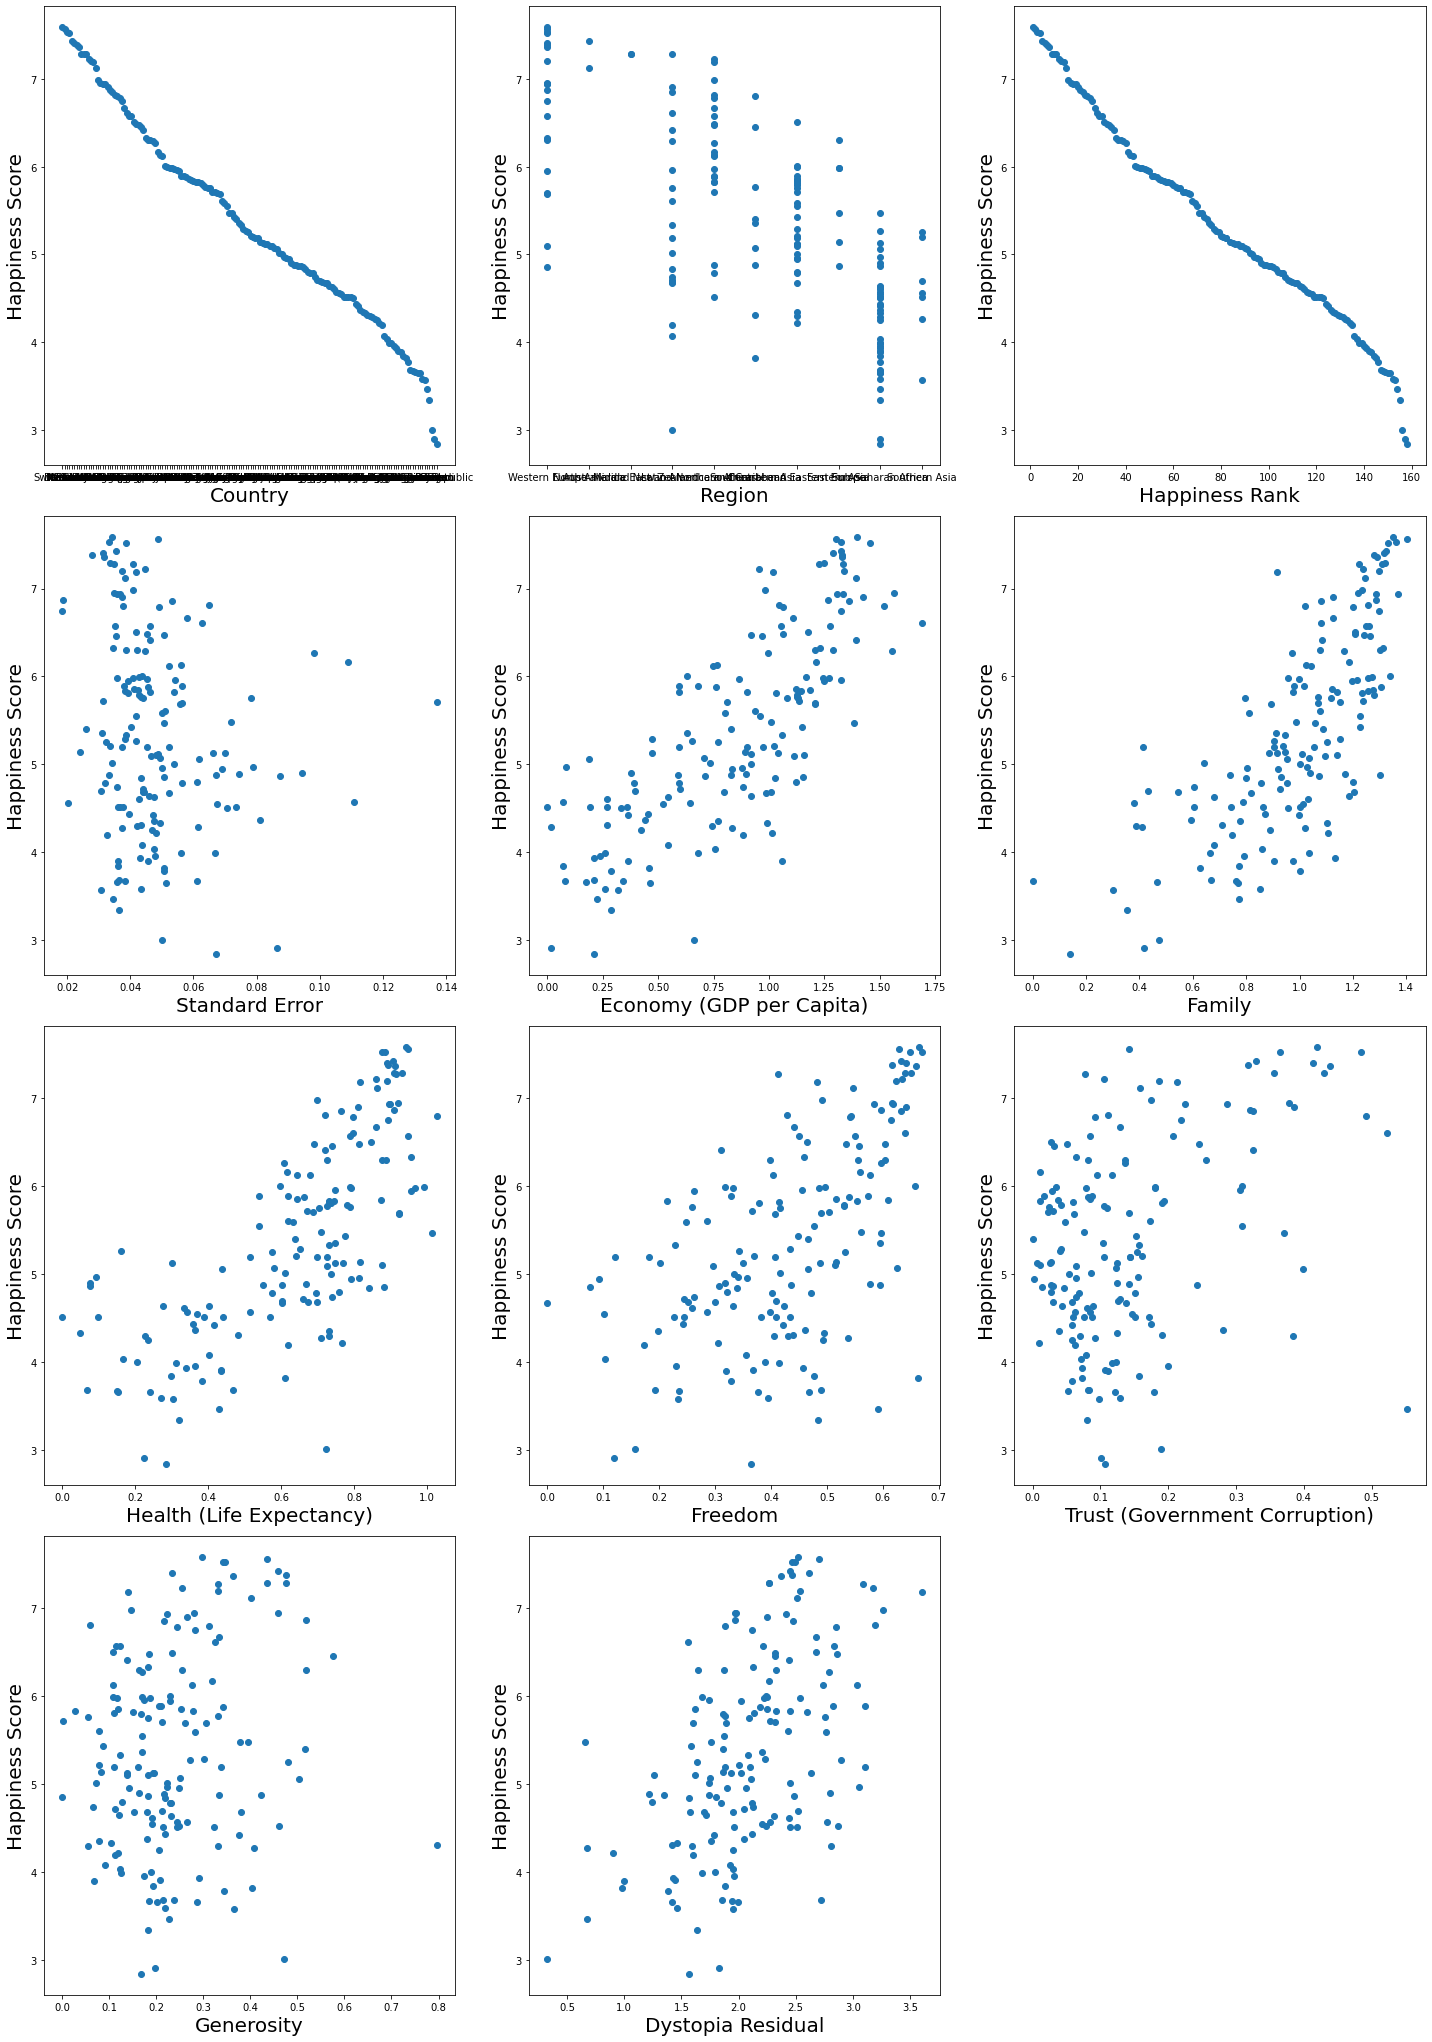

In [12]:
#visualizing data relation between feature and label
plt.figure(figsize=(20,35),facecolor='white')
plotnumber=1
for column in X:
    if plotnumber<=11:
        ax=plt.subplot(5,3,plotnumber)
        plt.scatter(X[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel("Happiness Score",fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [20]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [23]:
df['Country']=le.fit_transform(df['Country'])
df['Region']=le.fit_transform(df['Region'])

In [24]:
#checking correlation with heatmap
corr=df.corr()
corr.shape


(12, 12)

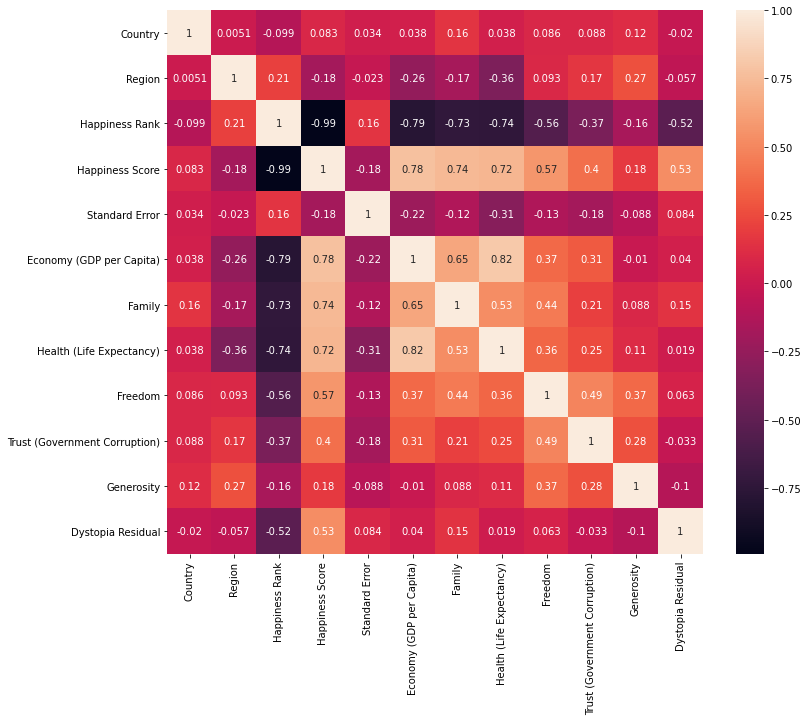

In [25]:
#visualising correlation using heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr,annot=True)
plt.show()

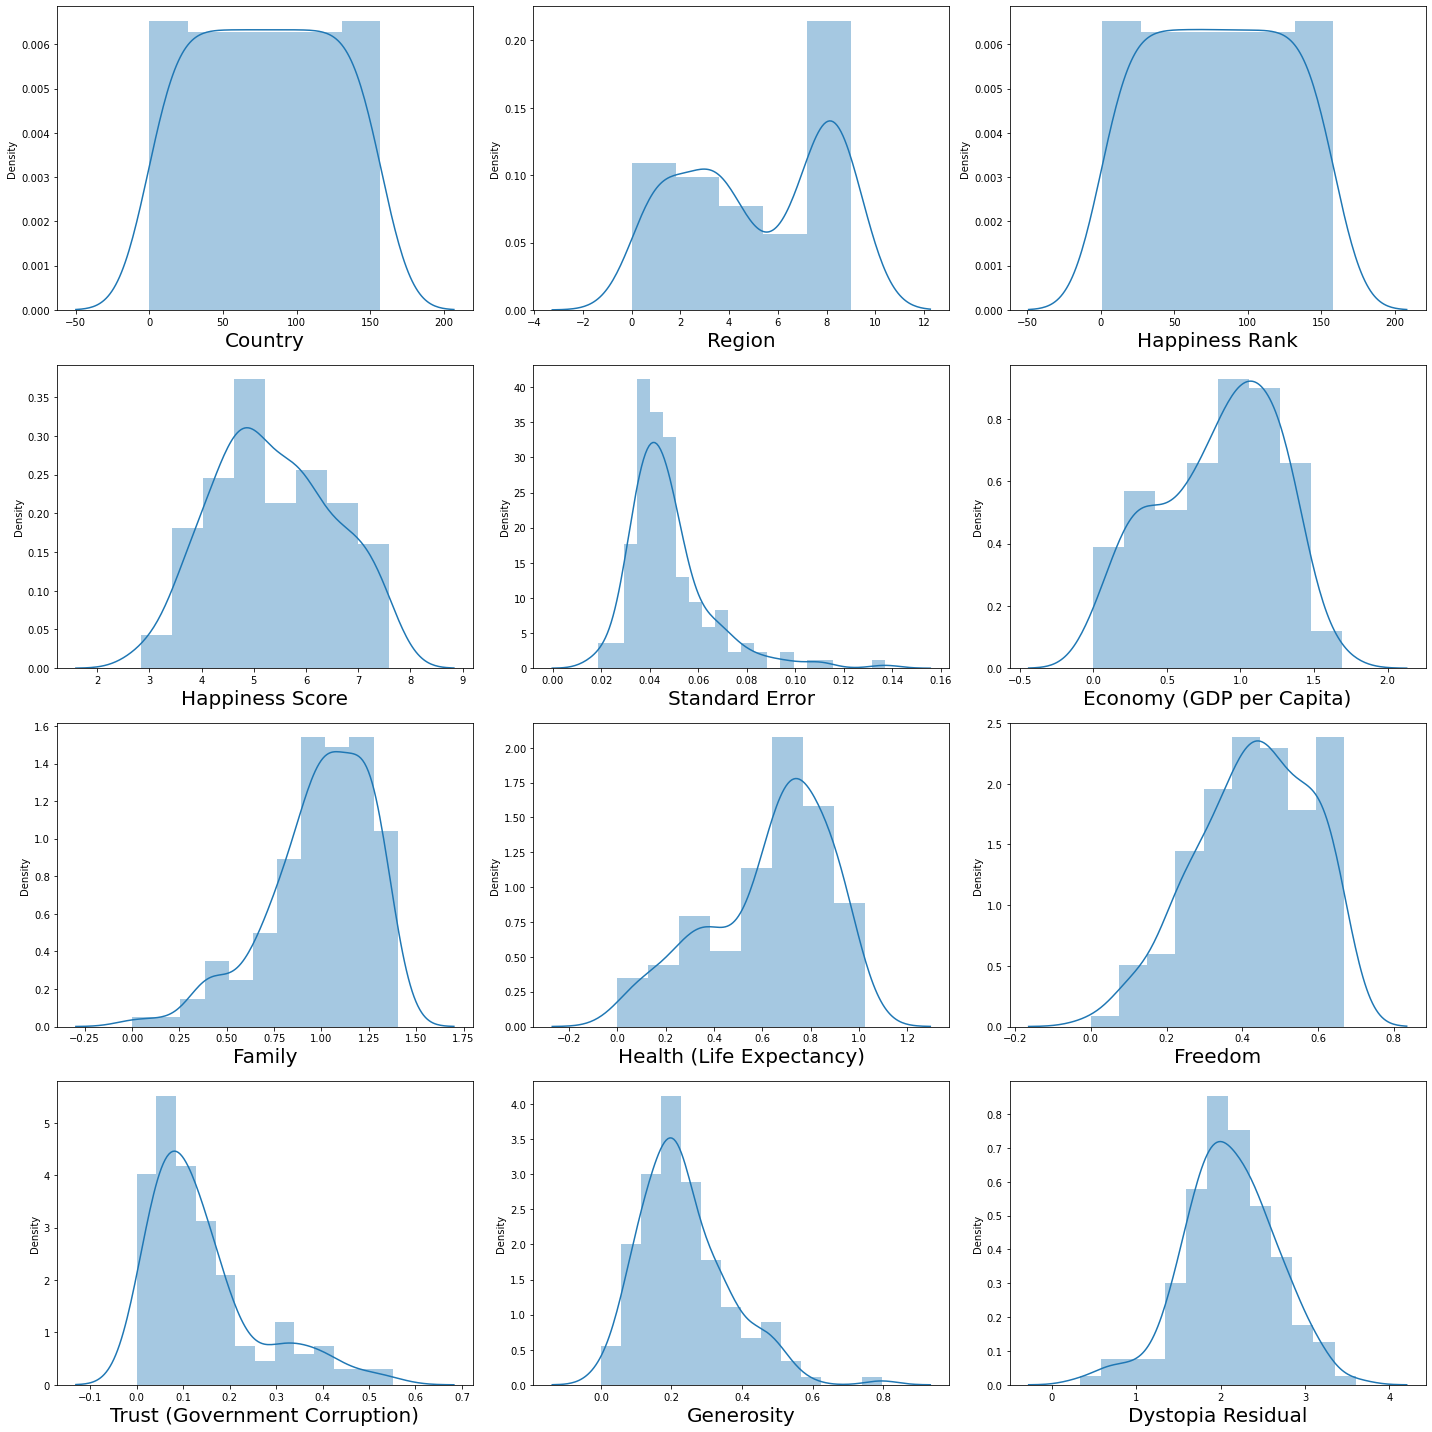

In [42]:
plt.figure(figsize=(20,20),facecolor='white')#checking data distribution wheather its normal (bell shape )
plotnumber=1
for column in df:
    if plotnumber<=12:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout() 

In [26]:
#checking correlation of features and target using corrwith
df.drop(columns=['Happiness Score'],axis=1).corrwith(df['Happiness Score'])

Country                          0.083380
Region                          -0.176791
Happiness Rank                  -0.992105
Standard Error                  -0.177254
Economy (GDP per Capita)         0.780966
Family                           0.740605
Health (Life Expectancy)         0.724200
Freedom                          0.568211
Trust (Government Corruption)    0.395199
Generosity                       0.180319
Dystopia Residual                0.530474
dtype: float64

In [ ]:
#Economy  and Health are correlated
#Happiness score and rank are highly neagativly correlated
#Economy,Health,family are good predictors
#economy , Health , family are neagativly correlated with happiness rank
#Country,Generosity are least contributing
####.....Country, Region,Generosity,standard error they have normal distribution,ouliers removed hence im keeping them as dataset is small.


Country                              AxesSubplot(0.125,0.71587;0.168478x0.16413)
Region                            AxesSubplot(0.327174,0.71587;0.168478x0.16413)
Happiness Rank                    AxesSubplot(0.529348,0.71587;0.168478x0.16413)
Happiness Score                   AxesSubplot(0.731522,0.71587;0.168478x0.16413)
Standard Error                      AxesSubplot(0.125,0.518913;0.168478x0.16413)
Economy (GDP per Capita)         AxesSubplot(0.327174,0.518913;0.168478x0.16413)
Family                           AxesSubplot(0.529348,0.518913;0.168478x0.16413)
Health (Life Expectancy)         AxesSubplot(0.731522,0.518913;0.168478x0.16413)
Freedom                             AxesSubplot(0.125,0.321957;0.168478x0.16413)
Trust (Government Corruption)    AxesSubplot(0.327174,0.321957;0.168478x0.16413)
Generosity                       AxesSubplot(0.529348,0.321957;0.168478x0.16413)
Dystopia Residual                AxesSubplot(0.731522,0.321957;0.168478x0.16413)
dtype: object

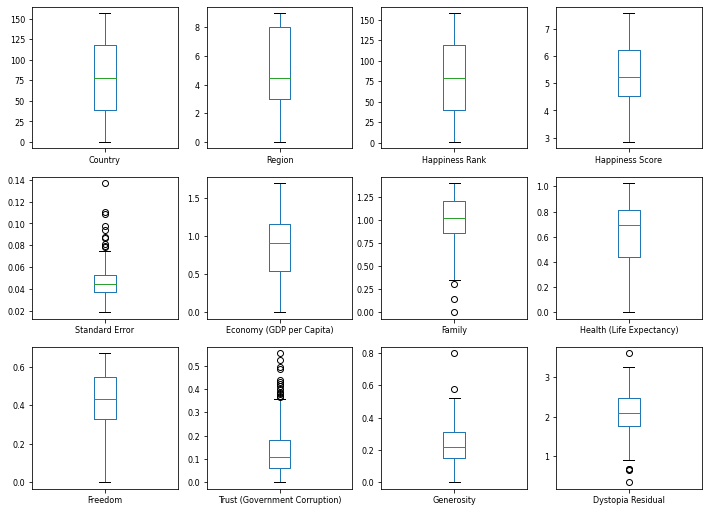

In [27]:
#checking for outliers
df.plot(kind = 'box', subplots = True, layout = (4,4), fontsize = 8, figsize = (12,12))

In [ ]:
#there are outliers in Standard Error,Family,Trust,Dystopia Resudual

In [29]:
from scipy.stats import zscore
z = np.abs(zscore(df))
z

array([[1.23877001, 1.30025593, 1.72099989, ..., 2.30965159, 0.47103971,
        0.75825809],
       [0.44946522, 1.30025593, 1.69907456, ..., 0.01647953, 1.57585637,
        1.09285682],
       [0.90989302, 1.30025593, 1.67714922, ..., 2.8427738 , 0.8242928 ,
        0.71233526],
       ...,
       [1.26069514, 0.37544095, 1.67742676, ..., 0.38141902, 1.85689094,
        3.20843049],
       [1.26069514, 0.96511655, 1.69935209, ..., 0.35771452, 0.31694987,
        0.48198451],
       [1.37032081, 0.96511655, 1.72127743, ..., 0.30180313, 0.5581534 ,
        0.96361241]])

In [30]:
print(np.where(z>3))

(array([ 27,  40,  64, 115, 128, 147, 153, 155, 157], dtype=int64), array([ 9,  4,  4,  4, 10,  6,  9, 11,  6], dtype=int64))


In [31]:
df_new = df[(z<3).all(axis = 1)]
df_new

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135,9,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58,9,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37,9,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105,9,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24,5,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
150,66,8,151,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,20,8,152,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,0,7,153,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
154,13,8,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328


In [33]:
X=df_new.drop(columns=['Happiness Score'],axis=1)
y=df_new['Happiness Score']

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [35]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=.25,random_state=342)
from sklearn.linear_model import LinearRegression
l_reg=LinearRegression()
l_reg.fit(X_train,y_train)

LinearRegression()

In [36]:
y_pred=l_reg.predict(X_test)

In [41]:
l_reg.score(X_test,y_test) #test data

0.9999999276615167

In [39]:
l_reg.score(X_train,y_train)#train data

0.9999999408069347

In [40]:
#Model Evaluation
from sklearn.metrics import mean_squared_error,mean_absolute_error

print(mean_absolute_error(y_test,y_pred))

print(mean_squared_error(y_test,y_pred))

print(np.sqrt(mean_squared_error(y_test,y_pred)))

0.00024691756241517436
8.785498318666365e-08
0.0002964034129133193


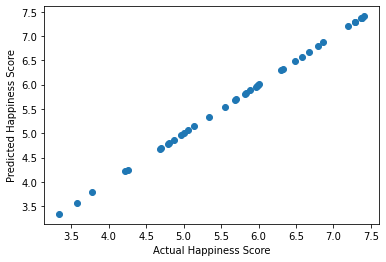

In [43]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Happiness Score')
plt.ylabel('Predicted Happiness Score')
plt.show()